In [56]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
%matplotlib inline
plt.style.use("seaborn")

In [57]:
#Load the data :
df = pd.read_excel(r'D:\simplilearn\projects_assignments\1.assessment1\1553768847_housing.xlsx')

In [58]:
#Check first few Rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [59]:
#Get Statistical overview of dataframe
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Observation from Describe output

total rooms, total bedrooms, population and households has outliers on the upper side.<br/>
All above mentioned features are right skewed.


In [60]:
#Get basic informaton about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB



Dataset Description :<br/>
This dataset has 20640 instances, all features are numerical except ocean_proximity which is catagorical. This feature need to be converted to numerical. It apperas to be ordinal as it is specifying distnace from ocean. Thus its values can be replaced with numbers.<br />
Also we need to take care of null values, we can replace null values with the median or that feature.<br />
Field 	Description<br/>
longitude 	(signed numeric - float) : Longitude value for the block in California, USA<br/>
latitude 	(numeric - float ) : Latitude value for the block in California, USA<br/>
housing_median_age 	(numeric - int ) : Median age of the house in the block<br/>
total_rooms 	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block<br/>
total_bedrooms 	(numeric - float ) : Count of the total number of bedrooms in all houses in the block<br/>
population 	(numeric - int ) : Count of the total number of population in the block<br/>
households 	(numeric - int ) : Count of the total number of households in the block<br/>
median_income 	(numeric - float ) : Median of the total household income of all the houses in the block<br/>
ocean_proximity 	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]<br/>
median_house_value 	(numeric - int ) : Median of the household prices of all the houses in the block<br/>

#### Replace missing values.

In [61]:
#Fill NaN values with median
df['total_bedrooms'].fillna(np.round(df['total_bedrooms'].median()), inplace=True)
df = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 
         'median_income', 'ocean_proximity', 'longitude', 'latitude', 'median_house_value']]

##### Convert categorical feature into numerical data, since this is some sort of ordering thus we are assiging numbers 

In [62]:
#Convert categorical column in the dataset to numerical data.
encoder = {'INLAND': 0, '<1H OCEAN': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4}
df['ocean_proximity'].replace(encoder, inplace=True)

##### Perpare X (independent) and y (dependent) for the estimator

In [63]:
#Select features and target and get X and y defined
features = df.columns.values[:-1]
target = df.columns.values[-1]
X, y = df[features], df[target]

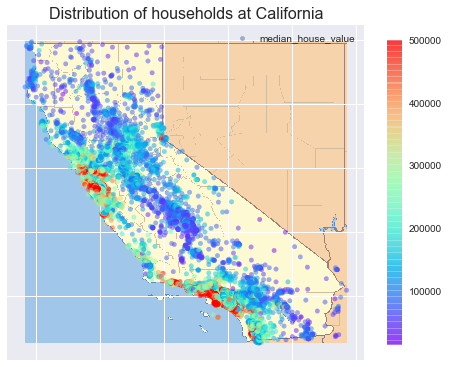

In [64]:
#Plot the household as per their median house prices in california
def leaflet_plot(lon, lat, target, image):

    fig = plt.figure(figsize=(8,8))
    img=plt.imread(image)
    plt.imshow(img, extent=[np.min(lon), np.max(lon), np.min(lat), np.max(lat)], zorder=0)


    plt.scatter(lon, lat, c=target, alpha=0.5, s=20, cmap='rainbow', label=target.name, zorder=1)
    cbar = plt.colorbar(shrink=.7, drawedges=False)
    plt.title("Distribution of households at California",size=16)
    plt.legend()
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    
    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    
leaflet_plot(df['longitude'], df['latitude'], target=df['median_house_value'], 
             image=r'D:\simplilearn\projects_assignments\1.assessment1\california.png')



<font size="2"> 
    From the above plot, it is observed that house prices are high near bay areas which are highly populated and crowded.<br />
    Near bay and near ocean are most crowded ares in California. House prices are low comparitiely at near ocean area. It appears, there are lot of hosues, that is why prices low despite being crowded. 
</font> 

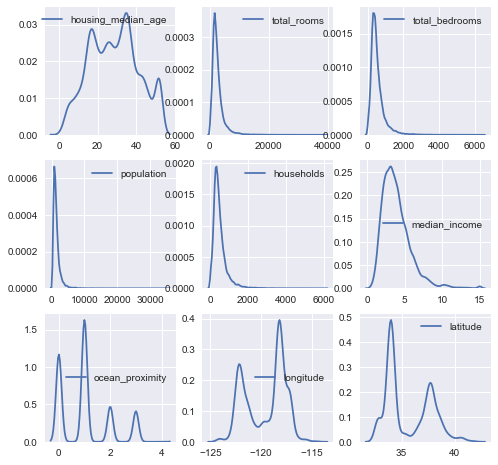

In [65]:
#Draw Frequency distribution for each feature in dataset
fig, axes = plt.subplots(3,3, figsize=(8,8))
for i, ax_row in zip(range(0,9,3), axes):
    for j, ax in enumerate(ax_row):
        sns.kdeplot(data=df.iloc[:,i+j], ax=ax)

Observation from above kde graphs.<br />
Most of the features are right skewed and some houses has very high prices. 

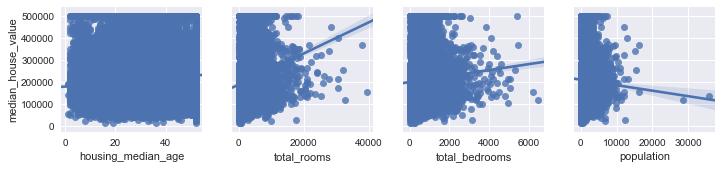

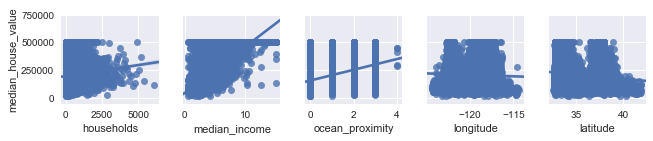

In [66]:
#Plot linear realtion between features and targert variable.
sns.pairplot(data=df, x_vars=features[:4], y_vars='median_house_value', kind='reg');
sns.pairplot(data=df, x_vars=features[4:], y_vars='median_house_value', kind='reg', height=2, aspect=0.9);

<font size=2> 
    Observations from above graphs.<br />
    Only median_income shows linear reation with target variable median_house_value
</font >

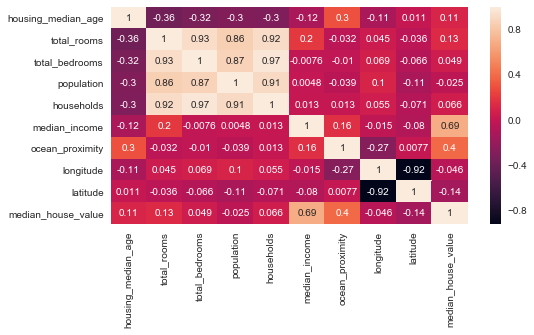

In [67]:
#Plot correlation amoung all features 
corr_matrix=df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True);

In [68]:
#Sorted co-relations of output variable with input variables
corr_matrix['median_house_value'].abs().sort_values(ascending=False)[1:]

median_income         0.688075
ocean_proximity       0.397251
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

<font size=2> 
    Observations from above graphs.<br />
    Total Rooms, total bedroom and households  has strong co-relation.<br />
    Also population has strong co-relation with households.
</font >

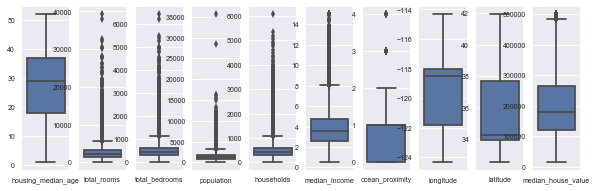

In [69]:
fig, axes = plt.subplots(1, 10, figsize=(10,3))
for i, ax in enumerate(axes):
    #It is important to set df[['col']] to assign xticks
    sns.boxplot(data=df[[df.columns.values[i]]], ax=ax)
    for l in ax.get_yticklabels(): 
        l.set_fontsize(7)

for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(7);

From the box plots it is evident that features has lot of outliers, except housing_median_aga and longitue and latitude

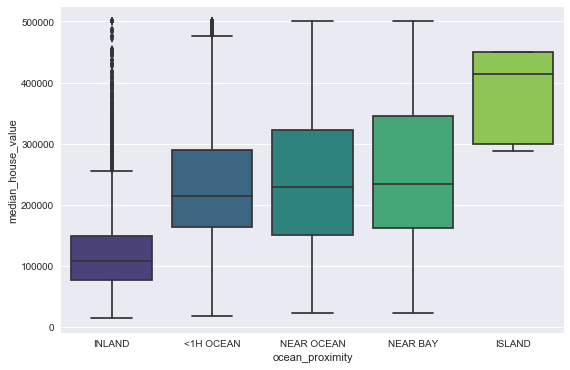

In [70]:

plt.figure(figsize=(9,6))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', palette='viridis');
plt.xticks(list(encoder.values()), list(encoder.keys()));


Price of houses vary with distance from Ocean and they are increasing from land towards island.

#### Split the dataset 

In [71]:
#Split data into 80% training dataset and 20% test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=8)
X_train.shape

(16512, 9)

#### Standardize data

In [72]:
#Standardize training and test datasets.
standardize = RobustScaler()
standardize.fit(X_train)
X_train_std = standardize.transform(X_train)
X_test_std = standardize.transform(X_test)


#### Plot kde of standardized dataset

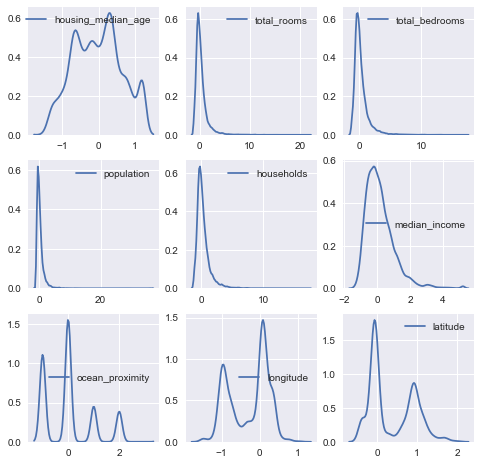

In [73]:
#Plot standardized data to bring all of them on same scale
fig, axes = plt.subplots(3, 3, figsize=(8,8))
for i, ax_row in zip(range(0,9,3), axes):
    for j, ax in enumerate(ax_row):
        sns.kdeplot(X_train_std[:,i+j], label=X.columns.values[i+j], ax=ax);

#### Train and Test linear regression classifier

In [74]:
#Train and test a LinerRegression model and check its accuracy and mean suared error
clflr = LinearRegression()
clflr.fit(X_train_std, y_train)
y_pred = clflr.predict(X_test_std)

print("Accuracy of model: {},\nMean squared error: {},\nMean absolute error: {}". format(clflr.score(X_test_std, y_test),
                                                                                        mean_squared_error(y_test, y_pred),
                                                                                        mean_absolute_error(y_test, y_pred)))

Accuracy of model: 0.6462133230257446,
Mean squared error: 4644257148.9274845,
Mean absolute error: 50217.7866464772


#### Model intercept, features and their respective weights

In [75]:
#Retrive the coefficinet of model and order them as per their Weights
print("Model Intercept: {}".format(clflr.intercept_))
print('Model Features and their respective weights.')
sorted(zip(X.columns.values, clflr.coef_), key=lambda x: x[1], reverse=True)

Model Intercept: 203820.72741341137
Model Features and their respective weights.


[('median_income', 86566.41970180855),
 ('total_bedrooms', 27020.0475938491),
 ('households', 24573.149095017136),
 ('housing_median_age', 20996.32877743346),
 ('ocean_proximity', 9633.25053824991),
 ('total_rooms', -10785.16777726161),
 ('population', -35231.08809058199),
 ('longitude', -130714.04999230843),
 ('latitude', -134632.62247001642)]

#### Finding out model accuracy and mean sqaured error with one independent variable.

In [76]:
#Tain and test a LinerRegression model with one featrue and check its accuracy and mean suared error
X_train_onevar, X_test_onevar = X_train[['median_income']], X_test[['median_income']]

clflr_onevar = LinearRegression()
clflr_onevar.fit(X_train_onevar, y_train)
y_pred_onevar = clflr_onevar.predict(X_test_onevar)
clflr_onevar.score(X_test_onevar, y_test), mean_squared_error(y_test, y_pred_onevar)
print("Accuracy of one feature model: {},\nMean squared error: {}". format(clflr_onevar.score(X_test_onevar, y_test),
                                                               mean_squared_error(y_test, y_pred_onevar)))

Accuracy of one feature model: 0.47864544504131645,
Mean squared error: 6843967782.226487


### Test of Model Validity


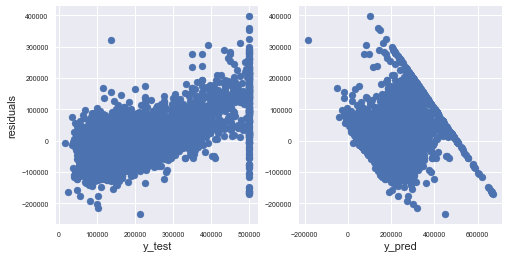

In [77]:
residuals = y_test - y_pred
df_residuals = pd.DataFrame(residuals)

fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].scatter(y_test, residuals)
axes[1].scatter(y_pred, residuals)

axes[0].set_xlabel('y_test')
axes[0].set_ylabel('residuals')
axes[1].set_xlabel('y_pred')

for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(7);

Text(0.5, 0, 'residuals')

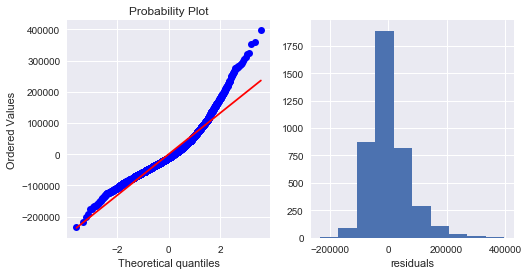

In [78]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
stats.probplot(residuals, plot=axes[0])
axes[1].hist(residuals)
axes[1].set_xlabel('residuals')

This model id not perfoming well as it is quite evident from mean_squared_error, accuracy and normality test of residuals.
This model needs lot of improvement to make its accuracy more than 85%. However it doesn't goes beyond 64.5% using LinearRegresion.

In [98]:
b = np.array([1,2,3])
np.hsplit(b,1)

[array([1, 2, 3])]

In [96]:
9/2

4.5